# Parabola
@author: [alberto.meneghello@isisspieve.it](mailto:alberto.meneghello@isisspieve.it)

#### Algoritmo di Euclide Esteso:
Calcola l'M.C.D. tra due numeri interi $a$ e $b$, determinando inoltre i coefficienti $x$ ed $y$ della combinazione lineare:  
$$a * x + b * y = MCD(a,b) \qquad \text{(identità di Bézout)}$$

In [18]:
def MCD(a,b):
    (M, x, y) = (a, 1, 0)
    if b != 0:
        (M, x, y) = MCD( b, a % b )
        (x, y) = ( y, x - (a // b) * y )
    if M < 0: (M, x, y) = (-M, -x, -y)
    return (M, x, y)

#### Punto all'origine:

Generalizza il concetto di ordinata all'origine nel contesto dei punti del piano $\mathbb{Z}^2$ (a coordinate intere):   
data una retta non verticale $\ r : a x + b y + c = 0 \ $ (con $b\not=0$), determina il punto 
$\ Q := (x_0,y_0) \ $ appartenente alla retta che ha l'ascissa non negativa minima ($0 \leq x_0 < b$).

In [ ]:
def punto_all_origine( a,b,c ):
    ( M, inva, invb ) = MCD(a,b)
    x0 = ( -c * inva ) % b
    if x0 < 0: x0 += b;
    y0 = (-c - a * x0 ) // b
    return ( x0, y0 )

#### Distanza punto-retta   
Calcola la distanza del punto $P=(x,y) \ $ dalla retta  $\ r : a x + b y + c = 0$.   
Nel contesto $\mathbb{Z}^2$ studiato, la retta è un insieme infinito e discreto di punti (si considerano solo i punti della retta euclidea le cui coordinate sono entrambe intere).
Si vuole determinare il punto della retta $r$ *più vicino* al punto $P$ dato, e ritornare la relativa distanza (secondo Manhattan).


In [ ]:
def distanza( x1,y1, x2,y2 ):
    return abs( x2 - x1 ) + abs( y2 - y1 )


def distanza_punto_retta( a,b,c, x,y ):
    (x0, y0) = punto_all_origine( a, b, c )
    
    if abs(a) <= abs(b):   # |m| <= 1
        
        steps = x // b
        x1 = x0 + steps * b
        y1 = y0 - steps * a
        if x1 < x:
            x2 = x1 + b
            y2 = y1 - a
        else:
            x2 = x1 - b
            y2 = y1 + a
            
    else:  # |m| > 1
        steps = - y // a
        x1 = x0 + steps * b
        y1 = y0 - steps * a
        if y1 >= y:
            x2 = x1 + b
            y2 = y1 - a
        else:
            x2 = x1 - b
            y2 = y1 + a

    d1 = distanza( x, y, x1, y1 )  # distanza di P da R1
    d2 = distanza( x, y, x2, y2 )  # distanza di P da R2
    return min( d1, d2 )

#### Grafico   
Disegna il grafico della parabola di fuoco $F=(x_F,y_F)$  e direttrice $d : a x + b y + c = 0$, renderizzando la porzione di piano 
$[x_{min}, x_{max}] \times [y_{min}, y_{max}]$.

In [ ]:
def check( retta ):
    (a,b,c) = retta
    if b < 0: (a,b,c) = (-a,-b,-c)
    (M,x,y) = MCD(a,b)
    if M != 1:
        if c % M == 0:
            (a,b,c) = ( a//M, b//M, c//M )
        else:
            print("ERRORE: L'equazione data non identifica una retta!")
    return (a,b,c)


def grafico( retta, fuoco, regione=(-10,10,-10,10) ):
    (a,b,c) = check(retta)
    (xf,yf) = fuoco
    (xmin,xmax,ymin,ymax) = regione
    from matplotlib import pyplot as plt
    plt.rcParams["figure.figsize"] = [xmax-xmin, ymax-ymin]
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.grid()
    plt.axhline(y=0, linewidth=3, color="gray")
    plt.axvline(x=0, linewidth=3, color="gray")
    
    for x in range(xmin,xmax+1,1):
        for y in range(ymin,ymax+1,1):
            if distanza_punto_retta(a,b,c, x,y) == distanza(xf,yf, x,y ):   # Parabola
                plt.plot( x, y, marker="o", markersize=25, markeredgecolor="grey", markerfacecolor="red")
            elif a * x + b * y + c == 0:     # Retta direttrice
                plt.plot( x, y, marker="o", markersize=25, markeredgecolor="grey", markerfacecolor="blue")
            else:   # Piano
                plt.plot( x, y, marker="o", markersize=25, markeredgecolor="grey", markerfacecolor="white")
    # Fuoco
    plt.plot( xf, yf, marker="o", markersize=25, markeredgecolor="grey", markerfacecolor="cyan")
    
    #Punto all'origine
    (x0,y0) = punto_all_origine( a,b,c )
    plt.plot( x0, y0, marker="o", markersize=25, markeredgecolor="grey", markerfacecolor="green")
    
    plt.savefig("./Parabola.png", dpi = 150) 
    plt.show()
    plt.close()

### Esempio
direttrice : $ \ r : -2 x + 7 y + 4 = 0$    
fuoco : $ \ F = (-4,-2) $   
regione : $ \ [-30,10] \times [-20,20] $


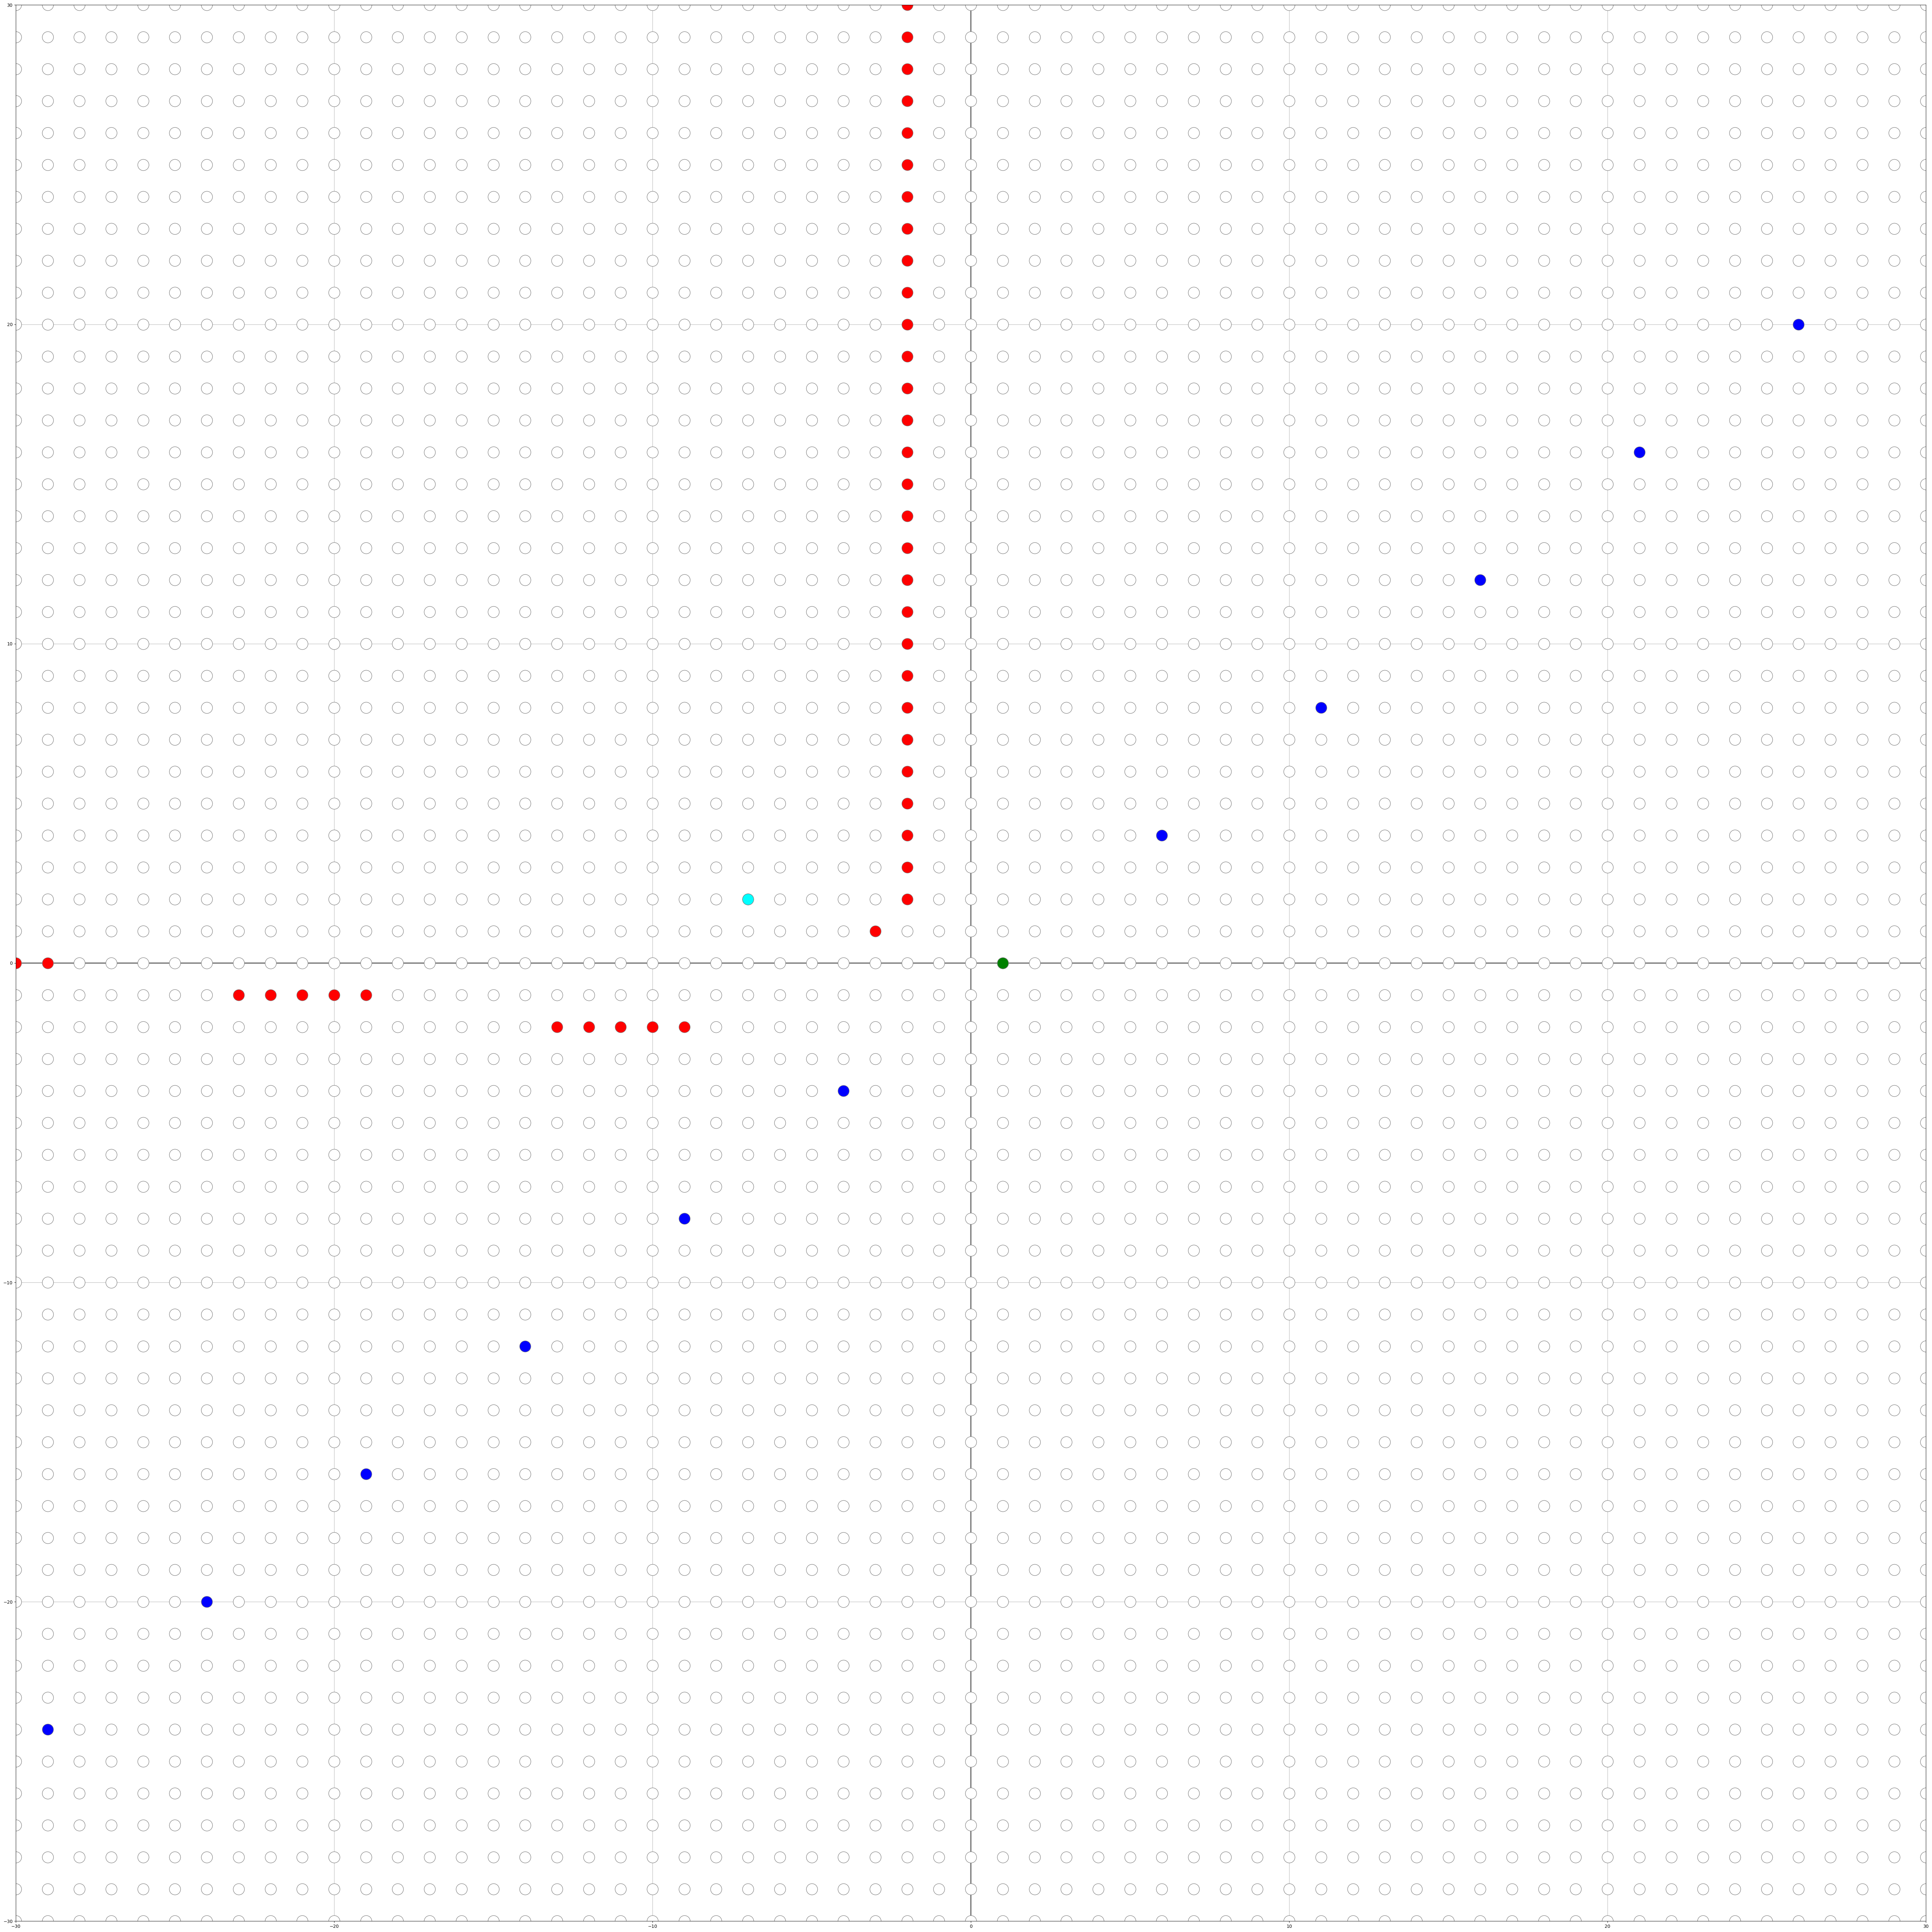

In [19]:
grafico( (4,-5,-4), (-7,2), (-30,30,-30,30) )